In [1]:
from qiskit import *
%matplotlib inline
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

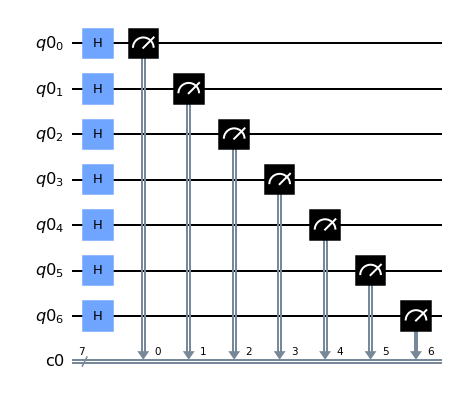

In [2]:
qr = QuantumRegister(7) # quantum bit register
cr = ClassicalRegister(7) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=1)

In [3]:
### B1. Execute the Quantum Circuit in Quantum Computer Simulator
from qiskit.tools.visualization import plot_histogram
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024, memory=True).result()
# get all experiments (number of shots)
raw_data = result.get_memory()
print(raw_data)

['0110011', '1101011', '0110000', '1010101', '1001011', '0111111', '1100101', '0101011', '1011010', '1101100', '0100011', '0000111', '0001110', '0110100', '0001000', '1100001', '1001001', '0011000', '0001010', '0101100', '1010011', '0000001', '1101100', '0010010', '0111010', '1110100', '1010100', '1100011', '1111101', '0011010', '1100100', '1010100', '0010011', '0001101', '0100010', '0110011', '0111010', '1000100', '0111010', '0110111', '1011010', '0001001', '0001010', '1011010', '1111101', '1000001', '1000101', '0001101', '0000010', '1100001', '0000111', '0011101', '1010001', '1111010', '1000001', '0011111', '0010010', '1001111', '0010011', '1011101', '0011100', '0111110', '1010001', '0101000', '1010001', '1100010', '1101010', '1100100', '1101101', '1101010', '0010001', '1001010', '1110000', '1101101', '0010111', '1001011', '1101101', '0111110', '0000001', '0000001', '0100101', '0011000', '0010110', '1111010', '0010110', '0001100', '1111000', '0110111', '1000100', '0001110', '1011011'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
counts = result.get_counts()
print(counts)

{'0011110': 2, '0000100': 5, '0111101': 8, '0111100': 6, '0000101': 10, '0010100': 9, '1000010': 9, '0001111': 9, '1111001': 13, '1110110': 9, '1110111': 5, '1110001': 4, '0100000': 7, '1000000': 11, '0110110': 5, '1101111': 7, '1010000': 11, '0000110': 5, '0101010': 10, '1011111': 12, '1010110': 3, '1101001': 8, '0011011': 7, '0000000': 9, '0100001': 7, '1101000': 7, '0111011': 6, '1100100': 10, '0100111': 9, '0101011': 8, '1110010': 5, '0001001': 8, '1101110': 6, '0110111': 8, '1000001': 10, '1010100': 13, '0010011': 8, '1111111': 6, '1011100': 7, '1110100': 6, '0001100': 5, '0010000': 12, '0011000': 8, '0111010': 10, '0100010': 10, '0010010': 11, '0001101': 7, '1101010': 9, '0011001': 6, '0000001': 9, '0100011': 11, '1000101': 7, '0010111': 6, '0001010': 8, '0100100': 7, '1010101': 9, '0000010': 11, '1001011': 11, '1100010': 7, '0110101': 2, '0001110': 9, '1100101': 7, '0101111': 5, '1100000': 5, '1010010': 9, '0011111': 10, '0110100': 5, '0111111': 8, '1001001': 7, '0011010': 9, '0

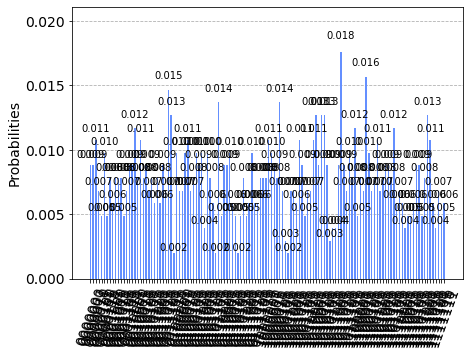

In [5]:
plot_histogram(counts)

In [6]:
from qiskit.tools.monitor import job_monitor
# load saved credential to access IBM Quantum Computing Experience on IBM Cloud
IBMQ.load_account()
# define the backend IBM quantum computer simulator to use
#provider = IBMQ.get_provider('ibm-q')
#backend = provider.get_backend('ibmq_manila’)
provider = IBMQ.load_account() 
backend = provider.backends.simulator_statevector
job = execute(circuit, backend=backend, shots=1024, memory=True)
job_monitor(job)

ibmqfactory.load_account:WARNING:2022-10-19 17:33:37,478: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2022-10-19 17:33:40,195: Credentials are already in use. The existing account in the session will be replaced.
/tmp/ipykernel_384/4148711399.py:8: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  backend = provider.backends.simulator_statevector


Job Status: job has successfully run
